In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
dataset = pd.read_csv('student_scores.csv')

In [59]:
dataset.shape

(25, 2)

In [60]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [61]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


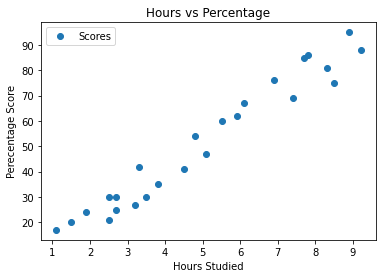

In [62]:
dataset.plot(x='Hours', y='Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Perecentage Score')
plt.show()

In [63]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [64]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [65]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = regressor.predict(X_test)

In [69]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [70]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Square Error: 21.5987693072174
Root Mean Square Error: 4.6474476121003665


In [71]:
import pickle

In [72]:
data = {"model":regressor, "hours":X_train}
with open ('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
    # this is for import model to streamlit for deployment

In [73]:
with open ('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
hours = data["hours"]    

In [74]:
y_pred = regressor_loaded.predict(X_train[[0]])
print(f"Number of Hours: {X_train[0]}, Marks: {y_pred}")

Number of Hours: [3.8], Marks: [39.67865467]


In [75]:
dataset2 = pd.read_csv('petrol_consumption.csv')

In [76]:
dataset2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [77]:
X=dataset2[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]

y=dataset2['Petrol_Consumption']

In [78]:
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [79]:
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [81]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

LinearRegression()

In [82]:
X.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'],
      dtype='object')

In [83]:
coeff_df = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [85]:
y_pred = regressor2.predict(X_test)

In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [87]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.82224747896471
Mean Square Error: 4666.344787588364
Root Mean Square Error: 68.3106491521517


<AxesSubplot:xlabel='Petrol_Consumption'>

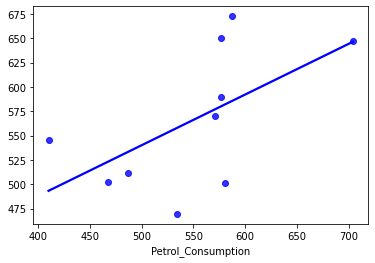

In [89]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

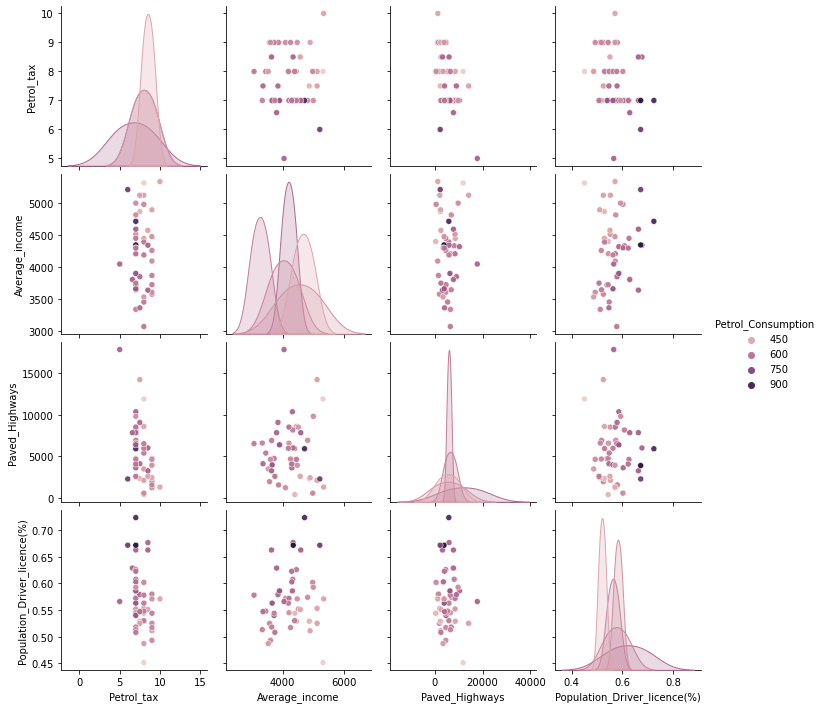

In [92]:
sns.pairplot(dataset2, hue="Petrol_Consumption")